# Step 1: Exploratory Data Analysis

---

Table of Contents
1. [Initial Insight](#initial-insight)
2. [Data Distribution](#data-disttribution)
3. [Feature Correlation](#feature-correlation)

In [1]:
# Imports and environment setup

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Custom utils functions
from utils import header
from utils import show_distribution
from utils import show_aggregate_distribution
from utils import show_distribution_corr
from utils import count_zero_vals

plt.style.use('ggplot')

## 1. Initial Insight<a id="initial-insight"></a>

Load datasets:

In [2]:
df_train = pd.read_csv("../data/Paitients_Files_Train.csv")  # Train dataset
df_train = df_train.rename(columns={"Sepssis": "Sepsis"})    # Incorrect spelling of "sepsis"
df_test = pd.read_csv("../data/Paitients_Files_Test.csv")    # Test dataset

### 1.1. Raw Train Dataset Overview
Shape, columns overview, and some essential statistics, and a peak into a few entries:

In [3]:
print(f"{header(9, 'SHAPE')}\n{df_train.shape}")
print(f"\n{header(19, 'NULL VALUES COUNT')}\n{df_train.isna().sum()}")
print(f"\n{header(39, 'COLUMNS OVERVIEW')}")
print(df_train.info())

╔═══════╗
║ SHAPE ║
╚═══════╝
(599, 11)

╔═══════════════════╗
║ NULL VALUES COUNT ║
╚═══════════════════╝
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
Sepsis       0
dtype: int64

╔═════════════════════════════════════╗
║          COLUMNS OVERVIEW           ║
╚═════════════════════════════════════╝
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 11 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         599 non-null    object 
 1   PRG        599 non-null    int64  
 2   PL         599 non-null    int64  
 3   PR         599 non-null    int64  
 4   SK         599 non-null    int64  
 5   TS         599 non-null    int64  
 6   M11        599 non-null    float64
 7   BD2        599 non-null    float64
 8   Age        599 non-null    int64  
 9   Insurance  599 non-null    int64  
 10  Seps

In [4]:
df_train.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000,599.000000
mean,3.824708,120.153589,68.732888,20.562604,79.460768,31.920033,0.481187,33.290484,0.686144
std,3.362839,32.682364,19.335675,16.017622,116.576176,8.008227,0.337552,11.828446,0.464447
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.100000,0.248000,24.000000,0.000000
50%,3.000000,116.000000,70.000000,23.000000,36.000000,32.000000,0.383000,29.000000,1.000000
75%,6.000000,140.000000,80.000000,32.000000,123.500000,36.550000,0.647000,40.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
df_train.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance,Sepsis
0,ICU200010,6,148,72,35,0,33.6,0.627,50,0,Positive
1,ICU200011,1,85,66,29,0,26.6,0.351,31,0,Negative
2,ICU200012,8,183,64,0,0,23.3,0.672,32,1,Positive
3,ICU200013,1,89,66,23,94,28.1,0.167,21,1,Negative
4,ICU200014,0,137,40,35,168,43.1,2.288,33,1,Positive


### 1.2. Raw Test Dataset Overview
Shape, columns overview, and some essential statistics, and a peak into a few entries:

In [6]:
print(f"{header(9, 'SHAPE')}\n{df_test.shape}")
print(f"\n{header(19, 'NULL COUNT')}\n{df_test.isna().sum()}")
print(f"\n{header(39, 'COLUMNS OVERVIEW')}")
print(df_test.info())

╔═══════╗
║ SHAPE ║
╚═══════╝
(169, 10)

╔═════════════════╗
║   NULL COUNT    ║
╚═════════════════╝
ID           0
PRG          0
PL           0
PR           0
SK           0
TS           0
M11          0
BD2          0
Age          0
Insurance    0
dtype: int64

╔═════════════════════════════════════╗
║          COLUMNS OVERVIEW           ║
╚═════════════════════════════════════╝
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 169 entries, 0 to 168
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   ID         169 non-null    object 
 1   PRG        169 non-null    int64  
 2   PL         169 non-null    int64  
 3   PR         169 non-null    int64  
 4   SK         169 non-null    int64  
 5   TS         169 non-null    int64  
 6   M11        169 non-null    float64
 7   BD2        169 non-null    float64
 8   Age        169 non-null    int64  
 9   Insurance  169 non-null    int64  
dtypes: float64(2), int64(7), 

In [7]:
df_test.describe()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
count,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000,169.000000
mean,3.917160,123.520710,70.426036,20.443787,81.000000,32.249704,0.438876,33.065089,0.727811
std,3.402415,29.259123,19.426805,15.764962,110.720852,7.444886,0.306935,11.548110,0.446410
min,0.000000,56.000000,0.000000,0.000000,0.000000,0.000000,0.100000,21.000000,0.000000
25%,1.000000,102.000000,62.000000,0.000000,0.000000,27.600000,0.223000,24.000000,0.000000
50%,3.000000,120.000000,74.000000,23.000000,0.000000,32.400000,0.343000,28.000000,1.000000
75%,6.000000,141.000000,80.000000,32.000000,135.000000,36.600000,0.587000,42.000000,1.000000
max,13.000000,199.000000,114.000000,49.000000,540.000000,57.300000,1.698000,70.000000,1.000000


In [8]:
df_test.head()

,ID,PRG,PL,PR,SK,TS,M11,BD2,Age,Insurance
0,ICU200609,1,109,38,18,120,23.1,0.407,26,1
1,ICU200610,1,108,88,19,0,27.1,0.400,24,1
2,ICU200611,6,96,0,0,0,23.7,0.190,28,1
3,ICU200612,1,124,74,36,0,27.8,0.100,30,1
4,ICU200613,7,150,78,29,126,35.2,0.692,54,0


### 1.3 Observation & Domain Knowledge<a id="observation-and-domain-knowledge"></a>

The target column we are trying to predict is `Sepsis` (Positive/Negative) which records if a patient **had developed** sepsis during their ICU stay.

The 8 features we will be using to predict the target are:

| Feature | Data Type | Description                                     | Acceptable Range                                                                                    | Source                                                                                                                                           |
|:--------|:----------|:------------------------------------------------|:----------------------------------------------------------------------------------------------------|:-------------------------------------------------------------------------------------------------------------------------------------------------|
| PRG     | int       | Plasma glucose ($mmol/L$)                       | - Normal: 3.9 < `PRG` < 5.6<br/>- At risk of diabetes: 5.6 < `PRG` < 6.9<br/>- Diabetes 7.0 < `PRG` | [WHO](https://www.who.int/data/gho/indicator-metadata-registry/imr-details/2380#:~:text=The%20expected%20values%20for%20normal,(5.6%20mmol%2FL)) |
| PL      | int       | Blood Work Result-1 ($\mu U/ml$)                | Information not found.                                                                              |                                                                                                                                                  |
| PR      | int       | Blood Pressure ($mm Hg$)                        | - Normal: 90/60 < `PR` < 140/90                                                                     | [NHS](https://www.nhs.uk/common-health-questions/lifestyle/what-is-blood-pressure/)                                                              |
| SK      | int       | Blood Work Result-2 ($mm$)                      | No information found.                                                                               |                                                                                                                                                  |
| TS      | int       | Blood Work Result-3 ($\mu U/ml$)                | No information found.                                                                               |                                                                                                                                                  |
| M11     | float     | Body mass index (weight in $kg/(height in m)^2$ | - Normal: 18.5 < `M11` < 24.9<br/>- Overweight: 25 < `M11` < 29.9<br/> 30.0 < `M11`                 | [CDC](https://www.cdc.gov/healthyweight/assessing/index.html#:~:text=If%20your%20BMI%20is%20less,falls%20within%20the%20obese%20range.)          |
| BD2     | float     | Blood Work Result-4 ($\mu U/ml$)                | No information found.                                                                               |                                                                                                                                                  |
| Age     | int       | Patient's age ($years$)                         | Common sense: 0 <= `Age`                                                                            |                                                                                                                                                  |

Unused columns: `ID` and `Insurance`. These have no connection whatsoever to the patient physical well-being. We will drop these columns altogether.

In [9]:
df_train = df_train.drop(columns=['ID', 'Insurance'])
df_test = df_test.drop(columns=['ID', 'Insurance'])

Missing attribute values: At first glance, there seems to be no missing values in both of our datasets:

In [10]:
print(f"Null values count: {df_test.isna().sum().sum() + df_train.isna().sum().sum()}")

Null values count: 0


However, as [README.md from the dataset](../data/README.md) has provided, there are missing values in our datasets.

Looking at the `min` values for each column, we see that there are values that are 0:

In [11]:
print(f"{header(16, 'TRAIN DATA MIN')}\n{df_train.min()}")
print(f"\n{header(16, 'TEST DATA MIN')}\n{df_test.min()}")

╔════════════════╗
║ TRAIN DATA MIN ║
╚════════════════╝
PRG              0
PL               0
PR               0
SK               0
TS               0
M11            0.0
BD2          0.078
Age             21
Sepsis    Negative
dtype: object

╔═══════════════╗
║ TEST DATA MIN ║
╚═══════════════╝
PRG     0.0
PL     56.0
PR      0.0
SK      0.0
TS      0.0
M11     0.0
BD2     0.1
Age    21.0
dtype: float64


Further investigation:

In [12]:
lookup_cols = ['PRG', 'PL', 'PR', 'SK', 'TS', 'M11', 'BD2', 'Age']
print(f"{header(35, 'TRAIN DATA ZERO VALUES COUNT')}\n{count_zero_vals(df_train, lookup_cols)}")
print(f"{header(35, 'TEST DATA ZERO VALUES COUNT')}\n{count_zero_vals(df_test, lookup_cols)}")

╔═════════════════════════════════╗
║  TRAIN DATA ZERO VALUES COUNT   ║
╚═════════════════════════════════╝
               Count     Percentage
-----------------------------------
PRG               93         15.53%
PL                 5          0.83%
PR                28          4.67%
SK               175         29.22%
TS               289         48.25%
M11                9          1.50%
BD2                0          0.00%
Age                0          0.00%

╔═════════════════════════════════╗
║   TEST DATA ZERO VALUES COUNT   ║
╚═════════════════════════════════╝
               Count     Percentage
-----------------------------------
PRG               18         10.65%
PL                 0          0.00%
PR                 7          4.14%
SK                52         30.77%
TS                85         50.30%
M11                2          1.18%
BD2                0          0.00%
Age                0          0.00%



We can observe that:

- In the train dataset: PRG, PL, PR, SK, TS, and M11 all have values that are 0s.
- In the test dataset: PRG, PR, SK, TS, and M11 also have values that are 0s.

As discussed [above](#observation-and-domain-knowledge), it is obvious that these are vital metrics, and they should not be zero. So it is reasonable to assume that these 0 values are our missing data mentioned by the dataset provider.

For actual training and evaluation of our model, we will deal with these missing values in the train dataset only, as the test dataset is used for testing and should contain such data to better evaluate our model's performance against them. Since the percentage of the missing data is so large, especially for the column TS, removing those entries are out of the question. Instead, we will fill those 0s in with the mean value of the respective column.

In [13]:
df_train['PRG'] = df_train['PRG'].replace(0, df_train['PRG'].mean())
df_train['PL'] = df_train['PL'].replace(0, df_train['PL'].mean())
df_train['PR'] = df_train['PR'].replace(0, df_train['PR'].mean())
df_train['SK'] = df_train['SK'].replace(0, df_train['SK'].mean())
df_train['TS'] = df_train['TS'].replace(0, df_train['TS'].mean())
df_train['M11'] = df_train['M11'].replace(0, df_train['M11'].mean())

print(f"{header(35, 'TRAIN DATA ZERO VALUES COUNT')}\n{count_zero_vals(df_train, lookup_cols)}")

╔═════════════════════════════════╗
║  TRAIN DATA ZERO VALUES COUNT   ║
╚═════════════════════════════════╝
               Count     Percentage
-----------------------------------
PRG                0          0.00%
PL                 0          0.00%
PR                 0          0.00%
SK                 0          0.00%
TS                 0          0.00%
M11                0          0.00%
BD2                0          0.00%
Age                0          0.00%



**Conclusion:** We will be predicting `Sepsis` (categorical, binary) for new unseen data using the above 8 features. To do so, our prediction will be $0 < x < 1$ where $x$ is a float value representing the probability of a patient developing sepsis during their ICU stay. Then, we can use a threshold to covert that value back to the binary classification of either $Positive$ or $Negative$.

**Note:** To train our model, we need to convert the type of the `Sepsis` column in the train dataset to a float value (to match with our prediction format) with $0$ corresponds to $Negative$ and $1$ corresponds to $Positive$.

In [14]:
df_train_before = df_train.copy()
df_train["Sepsis"] = df_train["Sepsis"].map({"Negative": 0.0, "Positive": 1.0})

In [15]:
df_train_before.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,6.000000,148.0,72.0,35.000000,79.460768,33.6,0.627,50,Positive
1,1.000000,85.0,66.0,29.000000,79.460768,26.6,0.351,31,Negative
2,8.000000,183.0,64.0,20.562604,79.460768,23.3,0.672,32,Positive
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,Negative
4,3.824708,137.0,40.0,35.000000,168.000000,43.1,2.288,33,Positive


In [16]:
df_train.head()

,PRG,PL,PR,SK,TS,M11,BD2,Age,Sepsis
0,6.000000,148.0,72.0,35.000000,79.460768,33.6,0.627,50,1.0
1,1.000000,85.0,66.0,29.000000,79.460768,26.6,0.351,31,0.0
2,8.000000,183.0,64.0,20.562604,79.460768,23.3,0.672,32,1.0
3,1.000000,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0.0
4,3.824708,137.0,40.0,35.000000,168.000000,43.1,2.288,33,1.0


In [17]:
print(f"{header(9, 'SHAPE')}\n{df_train.shape}")
print(f"\n{header(19, 'NULL COUNT')}\n{df_train.isna().sum()}")
print(f"\n{header(39, 'COLUMNS OVERVIEW')}")
print(df_train.info())

╔═══════╗
║ SHAPE ║
╚═══════╝
(599, 9)

╔═════════════════╗
║   NULL COUNT    ║
╚═════════════════╝
PRG       0
PL        0
PR        0
SK        0
TS        0
M11       0
BD2       0
Age       0
Sepsis    0
dtype: int64

╔═════════════════════════════════════╗
║          COLUMNS OVERVIEW           ║
╚═════════════════════════════════════╝
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 599 entries, 0 to 598
Data columns (total 9 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   PRG     599 non-null    float64
 1   PL      599 non-null    float64
 2   PR      599 non-null    float64
 3   SK      599 non-null    float64
 4   TS      599 non-null    float64
 5   M11     599 non-null    float64
 6   BD2     599 non-null    float64
 7   Age     599 non-null    int64  
 8   Sepsis  599 non-null    float64
dtypes: float64(8), int64(1)
memory usage: 42.2 KB
None


## 2. Data Distribution<a id="data-distribution"></a>

### 2.1. Overview
We will observe the data distribution by plotting a histogram for each column of our datasets. The test dataset is overlaid on top of the train dataset, except for the Sepsis column because it is only available in the Train dataset. KDE lines for both train and test data are also included to better visualize their distribution.

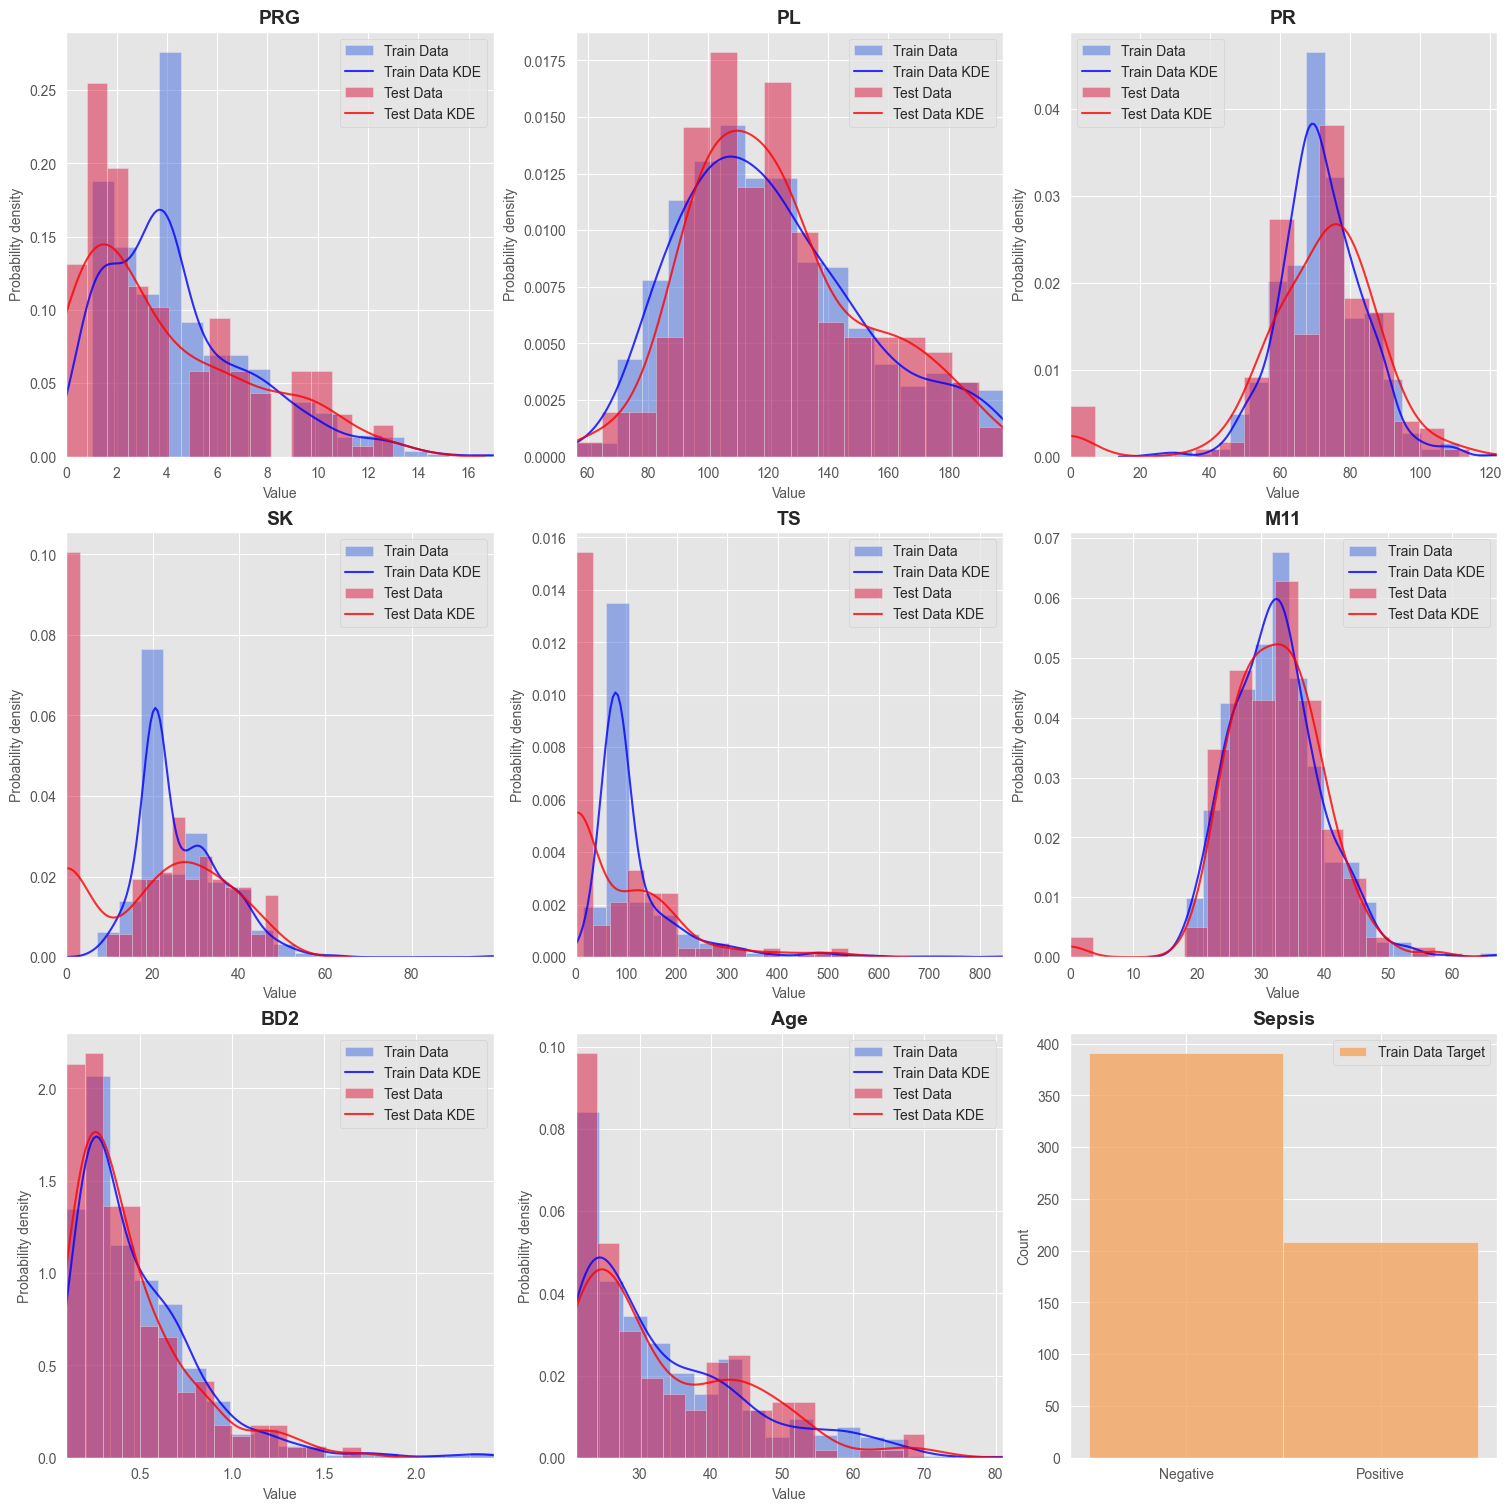

In [18]:
show_aggregate_distribution(df_train, df_test, "../images/EDA_Distribution_Overview.png")

### 2.1.1. Distribution Of PRG Feature
Plasma glucose.

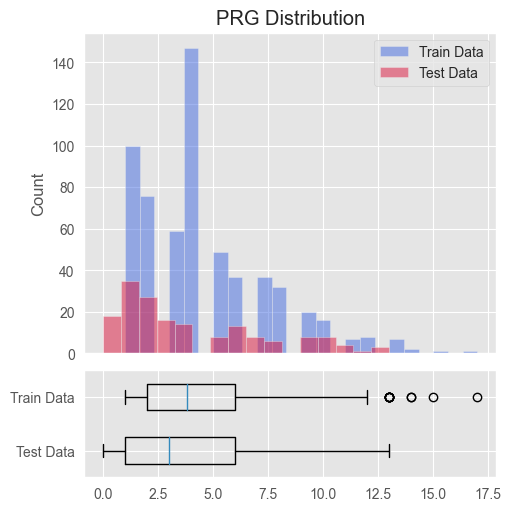

        PRG_TRAIN    PRG_TEST
count  599.000000  169.000000
mean     4.418527    3.917160
std      2.946267    3.402415
min      1.000000    0.000000
25%      2.000000    1.000000
50%      3.824708    3.000000
75%      6.000000    6.000000
max     17.000000   13.000000

Number of outliers in train data: 11
Number of outliers in test data: 0


In [19]:
show_distribution("PRG", df_train, df_test, "../images/EDA_Distribution_PRG.png")

### 2.1.2. Distribution Of PL Feature
Blood Work Result-1 (mu U/ml).

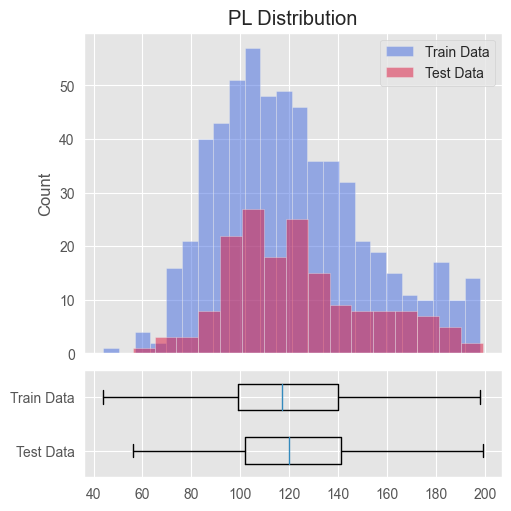

         PL_TRAIN     PL_TEST
count  599.000000  169.000000
mean   121.156541  123.520710
std     30.763933   29.259123
min     44.000000   56.000000
25%     99.000000  102.000000
50%    117.000000  120.000000
75%    140.000000  141.000000
max    198.000000  199.000000

Number of outliers in train data: 0
Number of outliers in test data: 0


In [20]:
show_distribution("PL", df_train, df_test, "../images/EDA_Distribution_PL.png")

### 2.1.3. Distribution Of PR Feature
Blood Pressure (mm Hg).

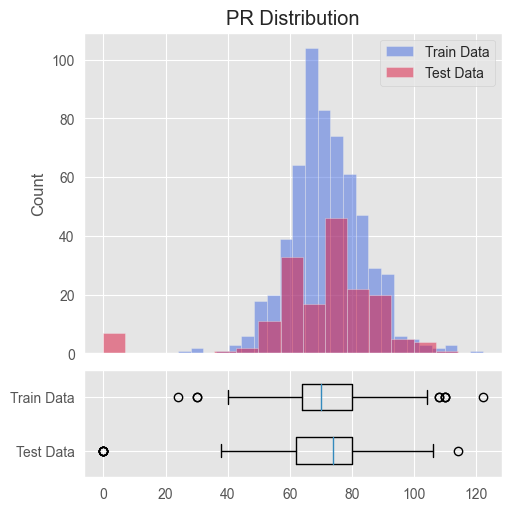

         PR_TRAIN     PR_TEST
count  599.000000  169.000000
mean    71.945778   70.426036
std     11.930128   19.426805
min     24.000000    0.000000
25%     64.000000   62.000000
50%     70.000000   74.000000
75%     80.000000   80.000000
max    122.000000  114.000000

Number of outliers in train data: 9
Number of outliers in test data: 8


In [21]:
show_distribution("PR", df_train, df_test, "../images/EDA_Distribution_PR.png")

### 2.1.4. Distribution Of SK Feature
Blood Work Result-2 (mm).

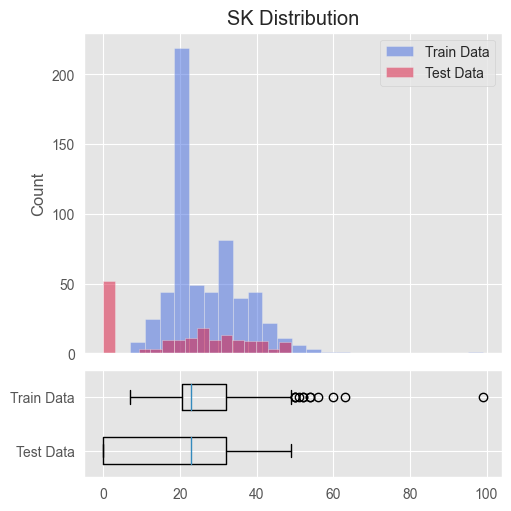

         SK_TRAIN     SK_TEST
count  599.000000  169.000000
mean    26.570043   20.443787
std      9.832568   15.764962
min      7.000000    0.000000
25%     20.562604    0.000000
50%     23.000000   23.000000
75%     32.000000   32.000000
max     99.000000   49.000000

Number of outliers in train data: 12
Number of outliers in test data: 0


In [22]:
show_distribution("SK", df_train, df_test, "../images/EDA_Distribution_SK.png")

### 2.1.5. Distribution Of TS Feature
Blood Work Result-3 (mu U/ml).

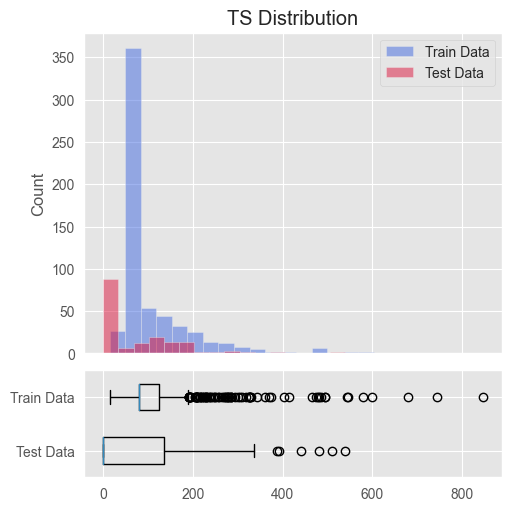

         TS_TRAIN     TS_TEST
count  599.000000  169.000000
mean   117.798267   81.000000
std     95.217445  110.720852
min     14.000000    0.000000
25%     79.460768    0.000000
50%     79.460768    0.000000
75%    123.500000  135.000000
max    846.000000  540.000000

Number of outliers in train data: 80
Number of outliers in test data: 6


In [23]:
show_distribution("TS", df_train, df_test, "../images/EDA_Distribution_TS.png")

### 2.1.6. Distribution Of M11 Feature
Body mass index (weight in kg/(height in m)^2).

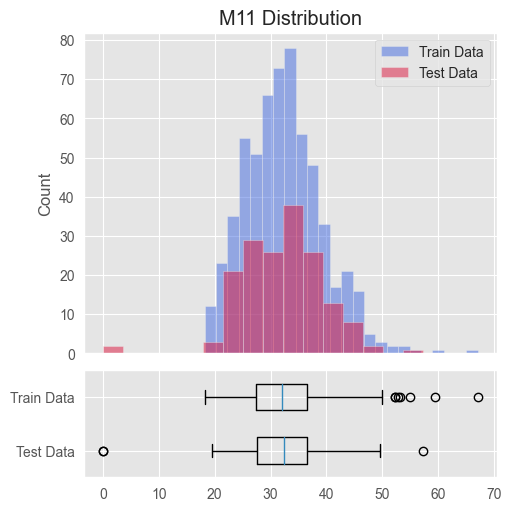

        M11_TRAIN    M11_TEST
count  599.000000  169.000000
mean    32.399633   32.249704
std      6.968993    7.444886
min     18.200000    0.000000
25%     27.400000   27.600000
50%     32.000000   32.400000
75%     36.550000   36.600000
max     67.100000   57.300000

Number of outliers in train data: 7
Number of outliers in test data: 3


In [24]:
show_distribution("M11", df_train, df_test, "../images/EDA_Distribution_M11.png")

### 2.1.7. Distribution Of BD2 Feature
Blood Work Result-4 (mu U/ml).

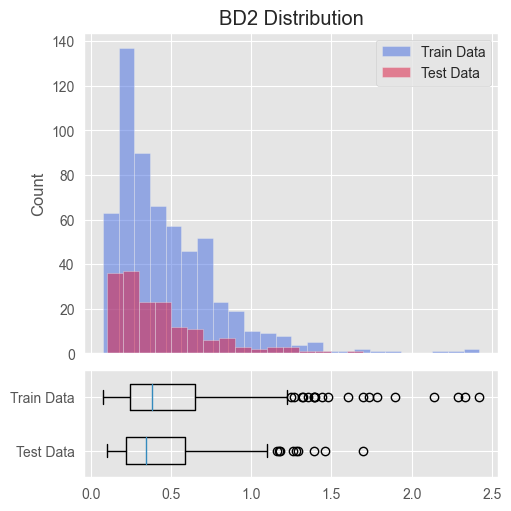

        BD2_TRAIN    BD2_TEST
count  599.000000  169.000000
mean     0.481187    0.438876
std      0.337552    0.306935
min      0.078000    0.100000
25%      0.248000    0.223000
50%      0.383000    0.343000
75%      0.647000    0.587000
max      2.420000    1.698000

Number of outliers in train data: 19
Number of outliers in test data: 9


In [25]:
show_distribution("BD2", df_train, df_test, "../images/EDA_Distribution_BD2.png")

### 2.1.8. Distribution Of Age Feature

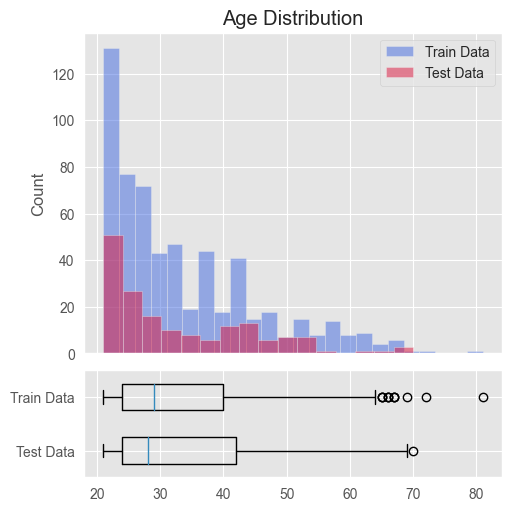

        Age_TRAIN    Age_TEST
count  599.000000  169.000000
mean    33.290484   33.065089
std     11.828446   11.548110
min     21.000000   21.000000
25%     24.000000   24.000000
50%     29.000000   28.000000
75%     40.000000   42.000000
max     81.000000   70.000000

Number of outliers in train data: 12
Number of outliers in test data: 1


In [26]:
show_distribution("Age", df_train, df_test, "../images/EDA_Distribution_Age.png")

### 2.1.9. Distribution of Sepsis Target

0.00% of patients had developed sepsis.
0.00% of patients had not developed sepsis.


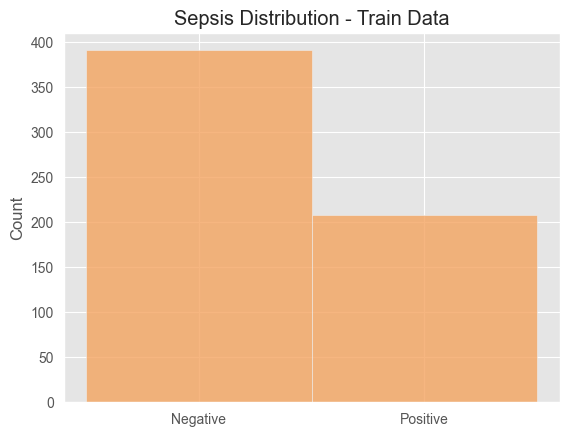

In [27]:
plt.hist(
    df_train["Sepsis"],
    bins=2,
    color="sandybrown",
    alpha=0.8
)
plt.ylabel("Count")
plt.title("Sepsis Distribution - Train Data")
plt.xticks([0.25, 0.75], labels=["Negative", "Positive"])

plt.savefig("../images/EDA_Distribution_Sepsis.png", dpi=300)

positiveCount = len(df_train[df_train["Sepsis"] == "Positive"])
negativeCount = len(df_train[df_train["Sepsis"] == "Negative"])
print(f"{(positiveCount / (len(df_train['Sepsis'])) * 100) :.2f}% of patients had developed sepsis.")
print(f"{(negativeCount / (len(df_train['Sepsis'])) * 100) :.2f}% of patients had not developed sepsis.")

### 2.1.10. Observation:

Overall characteristics:
- **Relationship between train data and test data:** The test dataset and the train dataset are very equally distributed: We can confidently assume that our model trained on the train dataset will be able to perform well on the test dataset. Note that we did leave in the invalid $0$ values in the test dataset, so there will be abnormal number of 0's in the distribution of the dataset columns.
- **Scaling:** All features has different min and max. Feature scaling will be required later when we process the data for our model to digest.
- **Outliers:** We can see that in both train and test data, there are some outliers affecting the distribution of some features. We will need to remove these outliers.

Analysis for each column:

| Column | Description                                   | Distribution                                                               | Conclusion                                                                                                                 |
|:-------|:----------------------------------------------|:---------------------------------------------------------------------------|:---------------------------------------------------------------------------------------------------------------------------|
| PRG    | Plasma glucose                                | Exponential distribution with few outliers.                                | Needs transformation to make distribution normal; might need to process outliers.                                          |
| PL     | Blood Work Result-1 (mu U/ml)                 | Normal distribution with no outliers. Slightly left skewed.                | Might need transformation to deal with skew                                                                                |
| PR     | Blood Pressure (mm Hg)                        | Normal distribution with few outliers. Slightly right skewed.              | Might need transformation to deal with skew; might need to process outliers.                                               |
| SK     | Blood Work Result-2 (mm)                      | Normal distribution with few outliers. Left skewed.                        | Needs transformation to deal with skew; might need to process outliers.                                                    |
| TS     | Blood Work Result-3 (mu U/ml)                 | Normal distribution with large number of outliers. Heavily left skewed.    | Needs transformation to deal with heavy skew; might need to process outliers.                                              |
| M11    | Body mass index (weight in kg/(height in m)^2 | Normal distribution with few outliers. Symmetrical                         | Might need to process outliers.                                                                                            |
| BD2    | Blood Work Result-4 (mu U/ml)                 | Normal distribution with moderate number of outliers. Heavily left skewed. | Needs transformation to make distribution normal; might need to process outliers.                                          |
| Age    | Patient's age (years)                         | Exponential distribution with few outliers.                                | Needs transformation to make distribution normal; might need to process outliers.                                          |
| Sepsis | Target                                        | Moderate class imbalance of 2:1 negative vs. positive cases.               | Imbalance most probably need to be addressed in our training procedure so that it does not affect our model's performance. |

## 3. Feature Correlation<a id="feature-correlation"></a>

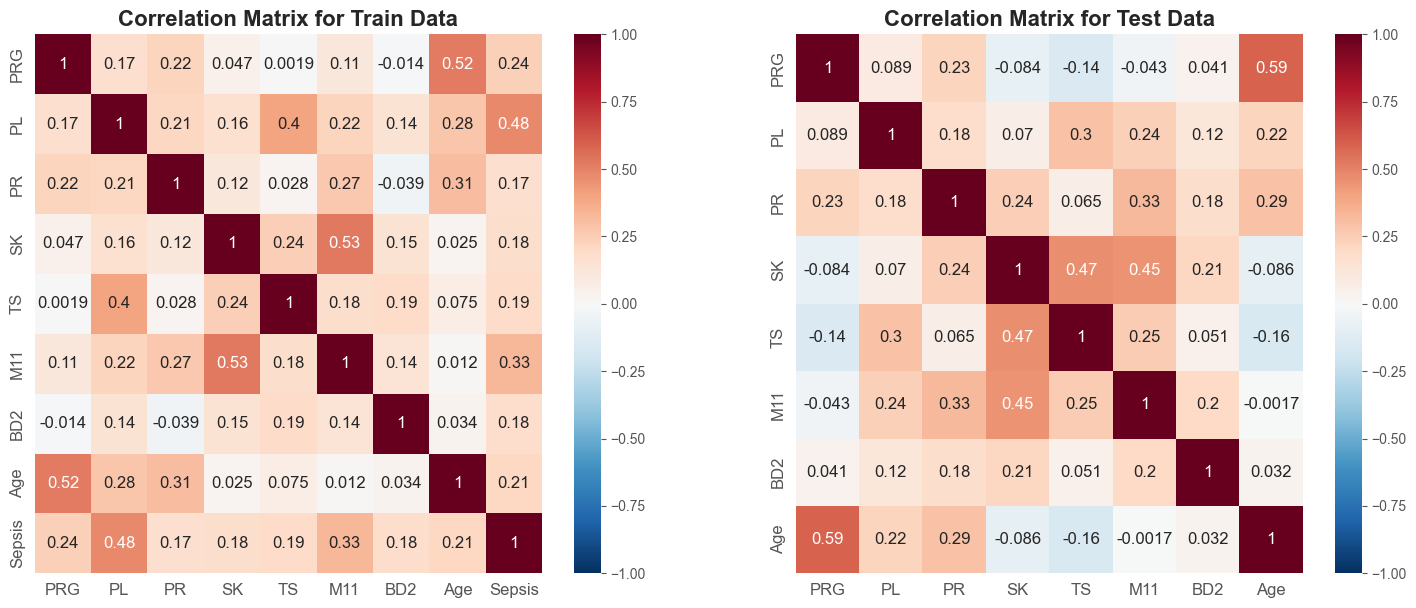

In [28]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(18, 7))

axes[0].set_title("Correlation Matrix for Train Data", fontsize=16, fontweight="bold")
mask = np.zeros_like(df_train.corr())
sns.heatmap(df_train.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True, ax=axes[0], annot_kws={"fontsize":12}, xticklabels=True)
axes[0].tick_params(axis='both', which='major', labelsize=12)

axes[1].set_title("Correlation Matrix for Test Data", fontsize=16, fontweight="bold")
sns.heatmap(df_test.corr(), vmin=-1, vmax=1, cmap='RdBu_r', annot=True, ax=axes[1], annot_kws={"fontsize":12}, xticklabels=True)
axes[1].tick_params(axis='both', which='major', labelsize=12)

fig.savefig("../images/EDA_Correlation.png", dpi=300)

plt.show()

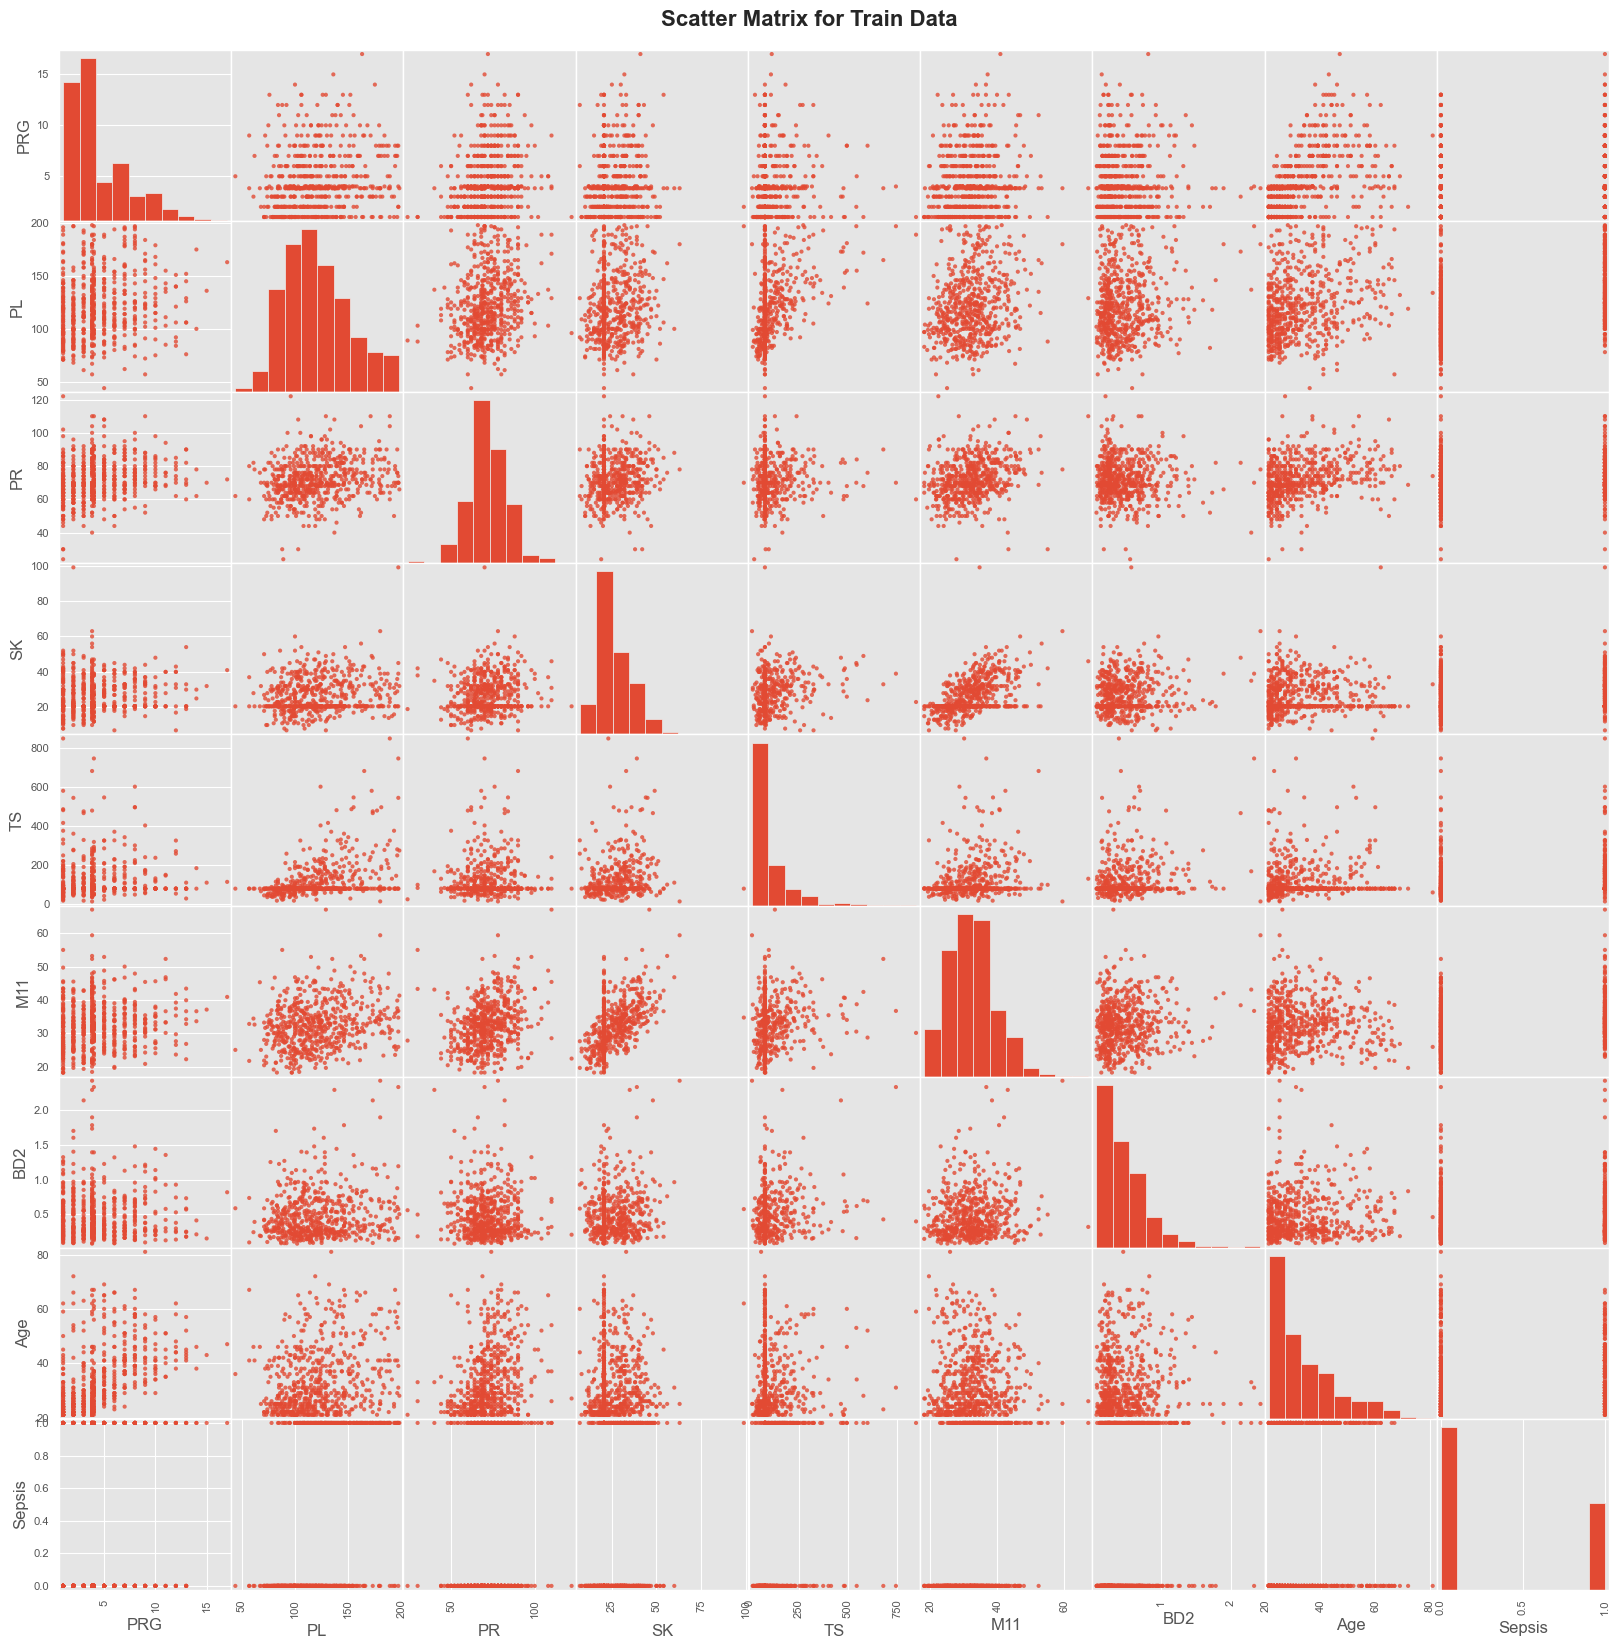

In [29]:
pd.plotting.scatter_matrix(df_train, figsize=(20, 20), alpha=0.8)
plt.suptitle("Scatter Matrix for Train Data", fontsize=16, fontweight="bold", y=0.9)
plt.savefig("../images/EDA_Correlation_ScatterMatrix_Train.png", dpi=300)
plt.show()

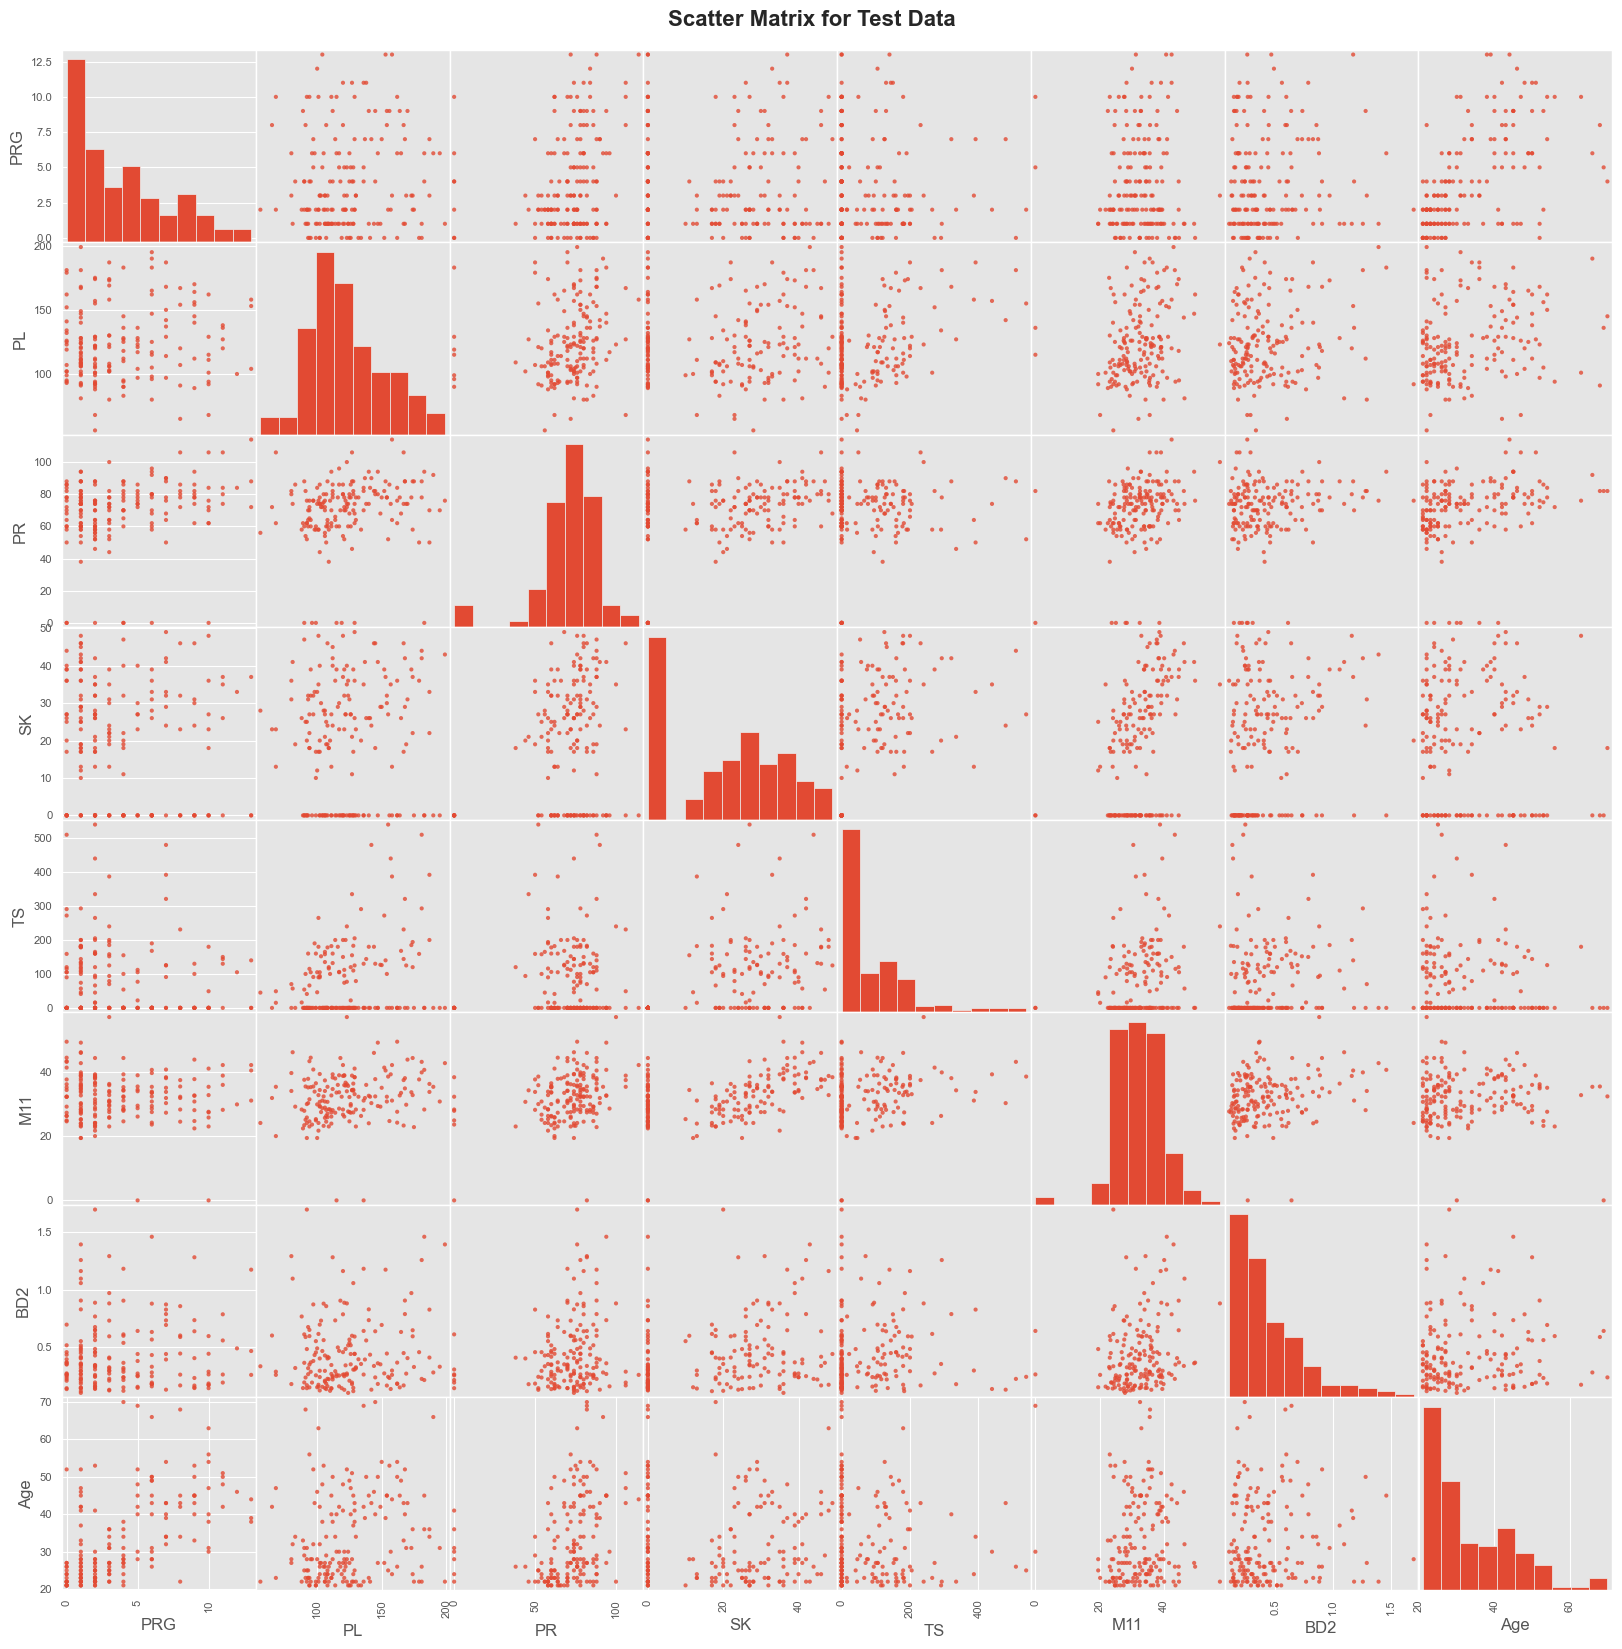

In [30]:
pd.plotting.scatter_matrix(df_test, figsize=(20, 20), alpha=0.8)
plt.suptitle("Scatter Matrix for Test Data", fontsize=16, fontweight="bold", y=0.9)
plt.savefig("../images/EDA_Correlation_ScatterMatrix_Test.png", dpi=300)
plt.show()

From the above correlation matrices and scatter matrices, we can conclude that both the train data and test data has very similar correlation between features. This further re-enforce our confidence that our model trained on the train dataset will perform well on the test dataset.

There is also seem to be a linear or at most polynomial of degree 3 correlation between the features. Then, if we are going to use a regression algorithm for our model, we should choose the degree for polynomial features of at most 3. Going over 3 is likely to make our model over-fit.

In more details:

- There is a moderate (0.53) correlation of Age-PRG. This is in agreement with medical researches done across a wide spectrum of races and sexes regarding the positive correlation between age and plasma glucose level due to the declining ability of the aging body to regulate blood glucose level [\[1\]](https://www.researchgate.net/publication/6753652_Effects_of_Age_on_Plasma_Glucose_Levels_in_Non-diabetic_Hong_Kong_Chinese) [\[2\]](https://www.ahajournals.org/doi/10.1161/CIRCRESAHA.118.312806) [\[3\]](https://bmcpublichealth.biomedcentral.com/articles/10.1186/s12889-021-10367-x) [\[4\]](https://www.researchgate.net/publication/329474872_The_effects_of_age_and_body_mass_index_on_blood_glucose_blood_cholesterol_and_blood_pressure_in_adult_women).
- As such, correlation of PRG-Sepsis and Age-Sepsis are roughly the same (~0.21), which is beneficial for training our model. We would expect these two features to have moderately significant weight on our model, and we might be able to drop one of those two features without affecting our model's performance.
- We also see a cluster of slight correlation between TS, PL, PR, M11, and BD2, but none of them are as significant as the correlation of Age-PRG. We can ignore this for now, unless we can theoretically or empirically prove that these correlation are significant enough to warrant manual feature selection.
- Aside from Age-Sepsis and PRG-Sepsis, we also see significant correlations (>0.1) of PL-Sepsis, M11-Sepsis, BD2-Sepsis, and TS-Sepsis (listed in order of level of correlation). We can also expect these feature to have significant weight in our model.

### 3.1. Further Insight

Into the correlation between Sepsis distribution by Age/PRG, PL, M11, BD2, and TS, in that order:

#### 3.1.1. Sepsis by Age/PRG

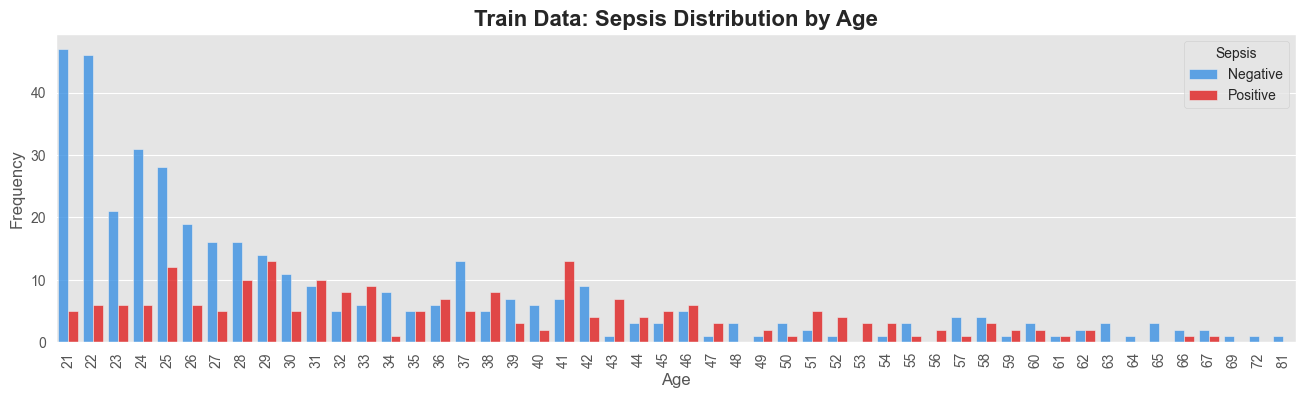

In [31]:
plt.figure(figsize=(16, 4))
sns.countplot(data=df_train, x="Age", hue="Sepsis", palette=["dodgerblue", "red"], alpha=0.8)

plt.title("Train Data: Sepsis Distribution by Age", fontsize=16, fontweight="bold")
plt.xlabel("Age", fontsize=12)
plt.ylabel("Frequency", fontsize=12)
plt.legend(title="Sepsis", loc="upper right", labels=["Negative", "Positive"])
plt.xticks(rotation=90, fontsize=10)
plt.yticks(fontsize=10)

plt.savefig("../images/EDA_Sepsis_By_Age_CrossTab.png", dpi=300)

plt.show()

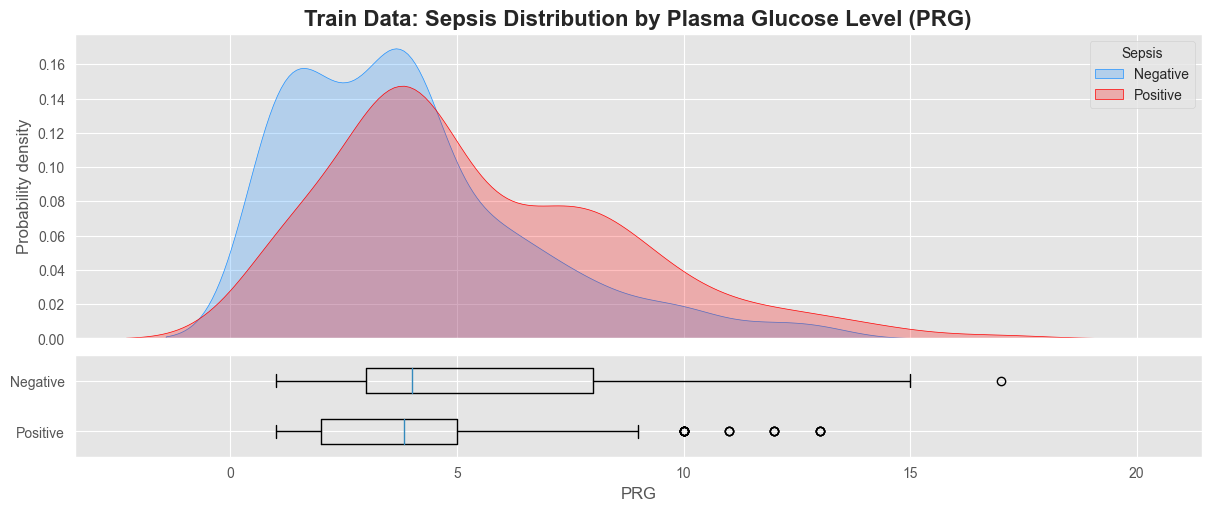

In [32]:
show_distribution_corr("PRG", "Sepsis", df_train, title="Train Data: Sepsis Distribution by Plasma Glucose Level (PRG)", save_path="../images/EDA_Sepsis_By_PRG_KDEBoxplot.png")

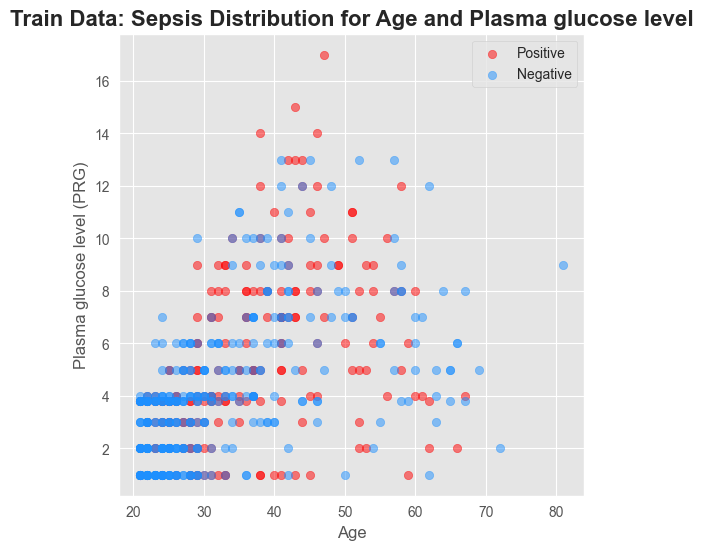

In [33]:
plt.figure(figsize=(6, 6))
plt.scatter(x=df_train["Age"][df_train["Sepsis"] == 1], y=df_train["PRG"][df_train["Sepsis"] == 1], color="red", alpha=0.5)
plt.scatter(x=df_train["Age"][df_train["Sepsis"] == 0], y=df_train["PRG"][df_train["Sepsis"] == 0], color="dodgerblue", alpha=0.5)

plt.title("Train Data: Sepsis Distribution for Age and Plasma glucose level", fontsize=16, fontweight="bold")
plt.legend(["Positive", "Negative"])
plt.xlabel("Age")
plt.ylabel("Plasma glucose level (PRG)")
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

plt.savefig("../images/EDA_Sepsis_By_Age_PRG_Scatter.png", dpi=300)

plt.show()

#### 3.1.2. Sepsis by PL

Sepsis by Blood Work Result-1

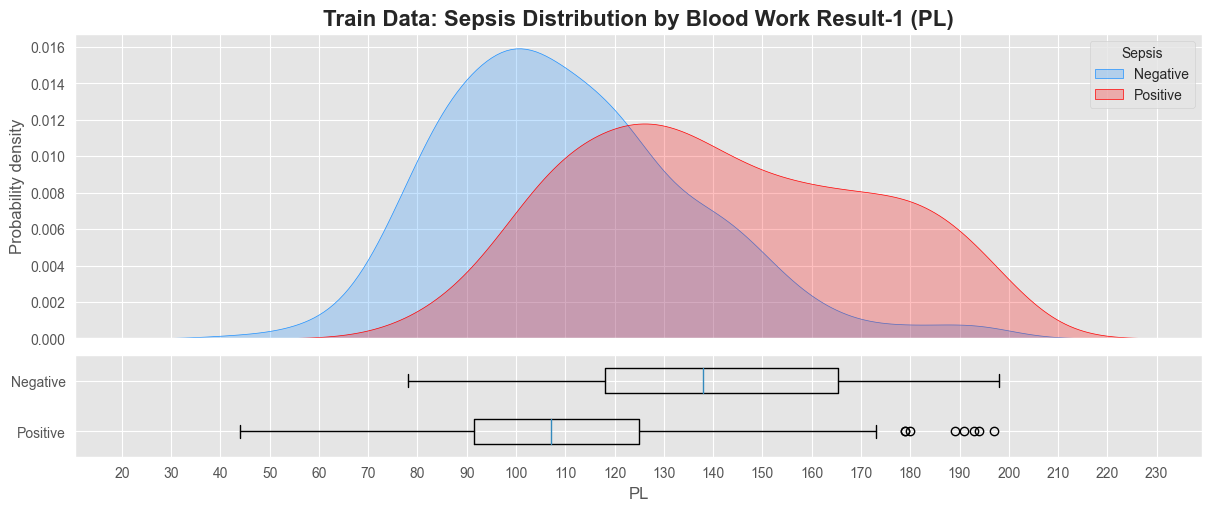

In [34]:
show_distribution_corr("PL", "Sepsis", df_train, title="Train Data: Sepsis Distribution by Blood Work Result-1 (PL)", ticker_multiple_locator=10, save_path="../images/EDA_Sepsis_By_PL_KDEBoxplot.png")

#### 3.1.3. Sepsis by M11

Sepsis by Body Mass Index

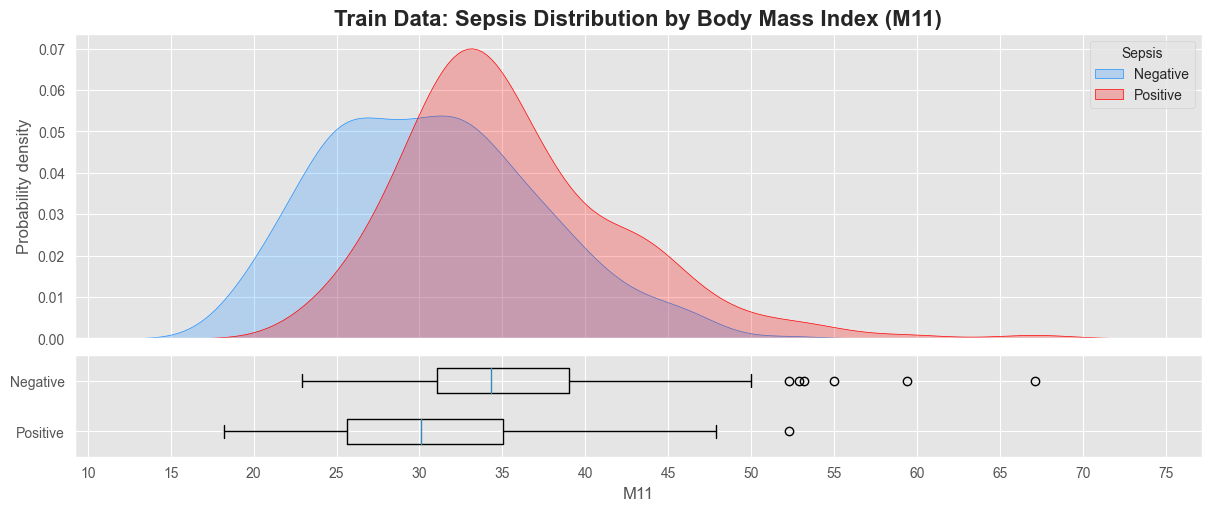

In [35]:
show_distribution_corr("M11", "Sepsis", df_train, title="Train Data: Sepsis Distribution by Body Mass Index (M11)", save_path="../images/EDA_Sepsis_By_M11_KDEBoxplot.png")

#### 3.1.4. Sepsis by BD2

Sepsis by Blood Work Result-4

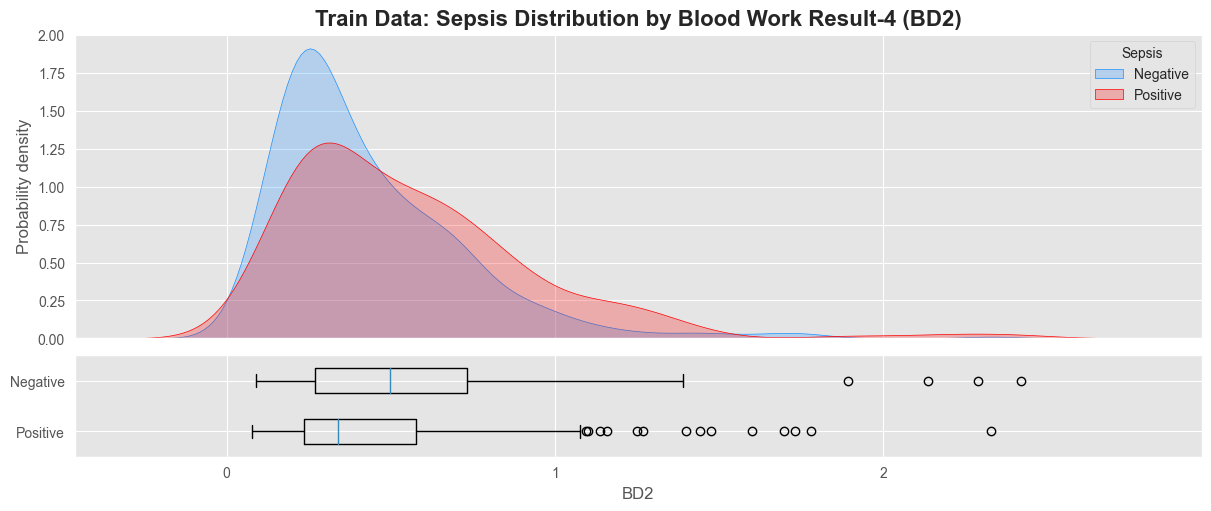

In [36]:
show_distribution_corr("BD2", "Sepsis", df_train, title="Train Data: Sepsis Distribution by Blood Work Result-4 (BD2)", ticker_multiple_locator=1, save_path="../images/EDA_Sepsis_By_BD2_KDEBoxplot.png")

#### 3.1.5. Sepsis by TS

Sepsis by Blood Work Result-3

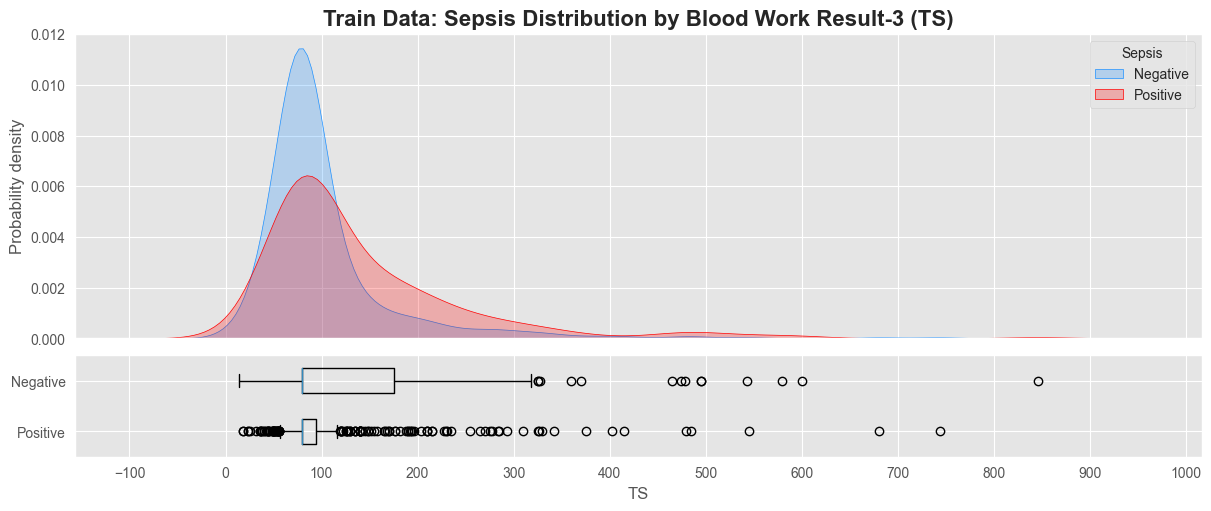

In [37]:
show_distribution_corr("TS", "Sepsis", df_train, title="Train Data: Sepsis Distribution by Blood Work Result-3 (TS)", ticker_multiple_locator=100, save_path="../images/EDA_Sepsis_By_TS_KDEBoxplot.png")

### 3.1.6. Further Observation:

- The proportion of patients that developed sepsis increases with age. It is likely that patient of older age (and thus higher PRG) tend to develop sepsis more than those of younger age.
- Overall, patients who developed sepsis tend to have higher PL, M11, BD2, and TS.

**Important Note:** We must keep in mind that this data still has not been processed for outliers / standardized / normalized, so some of these correlation can actually be stronger or weaker than they are displayed above. We should pay close attention to TS and BD2 since they seem to have the largest number of outliers.

We should not be too aggressive with outliers though, because our dataset only contains a small amount of datapoints. Removing or transforming outliers too aggressively might lead to us having a bad dataset.